<a href="https://colab.research.google.com/github/hoonzi-s/hongong_mldl/blob/main/02-2.%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [2]:
import numpy as np

In [8]:
# 리스트를 일렬로 세운 다음 차례대로 나란히 연결
fish_data = np.column_stack((fish_length, fish_weight))

In [9]:
# ones 함수와 zeres 함수 이용해서 target 쉽게 만들 수 있다
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
from sklearn.model_selection import train_test_split as tts

In [11]:
train_input, test_input, train_target, test_target = tts(fish_data, fish_target, random_state = 42)

In [13]:
print(train_input.shape, test_input.shape)
print(test_target)

(36, 2) (13, 2)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# stratify 매개변수에 타겟 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눌 수 있다.
train_input, test_input, train_target, test_target = tts(fish_data, fish_target, stratify = fish_target, random_state = 42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [22]:
kn.predict([[25, 150]])

array([0.])

In [23]:
# 주변 샘플 확인하기
distances, indexes = kn.kneighbors([[25, 150]])

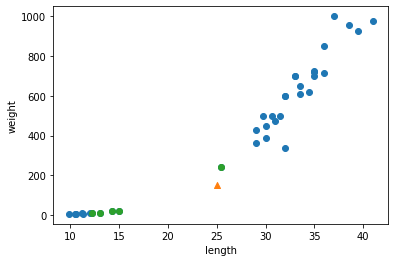

In [27]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
print(distances, indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


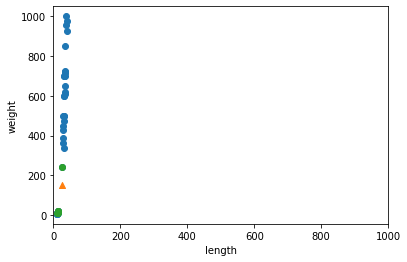

In [30]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0, 1000)
plt.show()

In [50]:
# 평균, 표준편차, 표준점수 구하기
mean = np.mean(train_input, axis = 0)   # axis가 0이면 행을 따라 각 열의 통계 값을 계산, 1이면 열을 따라 각 행의 통계값을 계산
std = np.std(train_input, axis = 0)
train_scaled = (train_input - mean) / std
new = ([25, 150] - mean) / std

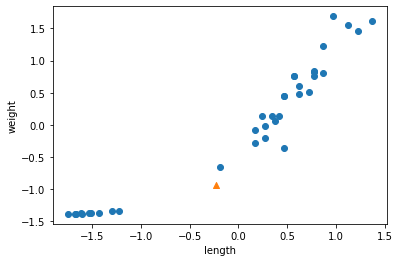

In [51]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [52]:
# 표준화한 데이터셋으로 K-최근접 이웃 모델 다시 훈련
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

In [53]:
# 표준화한 샘플 다시 예측
kn.predict([new])

array([1.])

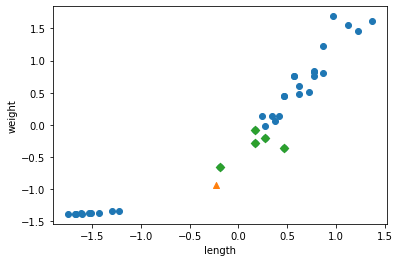

In [56]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length') ; plt.ylabel('weight')
plt.show()

In [58]:
a = 1

b = 1